# Lecture 13: July 22nd, 2024

__Today:__

* Finish Newton's Method material
* Start Python Unit 4 (image processing) 🎉

__Future:__

* Wednesday we'll talk about the final creative assignment
* Next week is considered a finals week, there will be no lectures – probably will be office hours instead, though
* Focus on getting outcomes you need done (essential outcomes + remaining Python outcomes); there will be more attempts during finals week
* I believe there are 102 lecture quizzes (points available)
* Token earning opportunity coming soon.

## Analyzing Newton's Method

Let $f(x) = x^3 - 2x + 2$. For each value of $z$ in `np.linspace(-2,2,1000)`, apply Newton's method 7 times, and call the result `results`. For how many of these 1000 values do we have $-0.001 < f(\text{results}) < 0.001$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
f = lambda x: x**3-2*x+2
df = lambda x: 3*x**2 - 2
newt = lambda z: z - f(z)/df(z)

__Idea:__ Each row of `arr` will be the result of applying Newton's method 7 times to a single point in `np.linspace(-2,2,1000)`. "A row for each point"

In [7]:
z = np.linspace(-2,2,1000)
reps = 7
arr = np.zeros((len(z),reps+1))
arr[:,0] = z

for i in range(reps):
    arr[:,i+1] = newt(arr[:,i])

In [8]:
results = arr[:,-1]

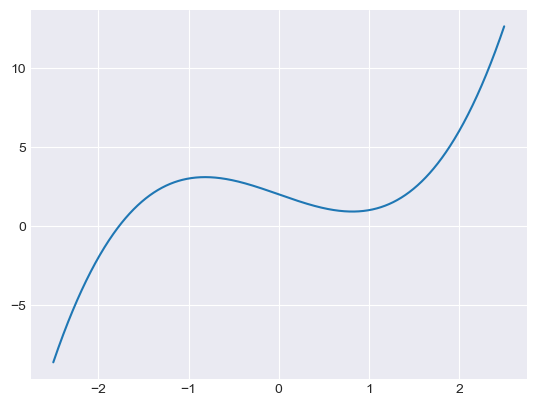

In [10]:
fig,ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x,f(x));

In [11]:
good_bool = np.abs(f(results)) < 0.001

The length makes sense, because we have 1000 points.

In [13]:
good_bool.shape

(1000,)

Out of the 1000 input points, we see that 327 of them lead to a good estimate for a zero of $f$.

In [14]:
good_bool.sum()

327

Let's plot these points and see where they live. There's a mistake here, we need the size of `pts` to match the size of the $y$-values. There's a pretty easy fix for this.

ValueError: x and y must have same first dimension, but have shapes (327,) and (1,)

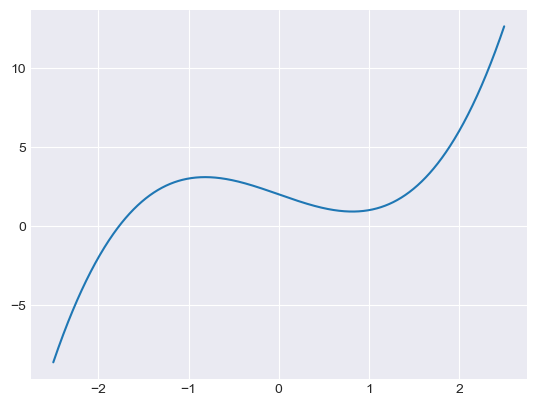

In [16]:
fig,ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
pts = z[good_bool]
ax.plot(x,f(x));
ax.plot(pts,0,'ko')


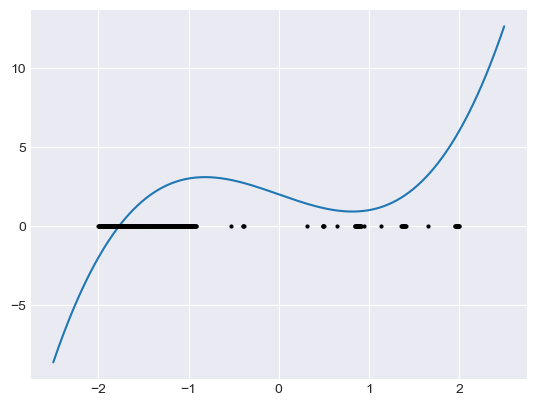

In [19]:
fig,ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
pts = z[good_bool]
ax.plot(x,f(x));
ax.plot(pts,np.zeros(len(pts)),'ko',markersize=2);

Let's update this plot to now have the bad points in red.

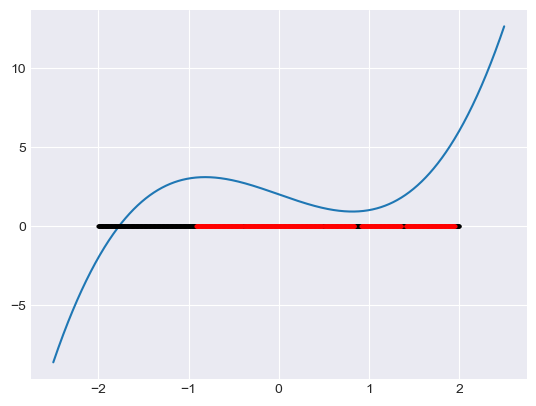

In [26]:
fig,ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
pts = z[good_bool]
pts2 = z[~good_bool]
ax.plot(x,f(x));
ax.plot(pts,np.zeros(len(pts)),'ko',markersize=2);
ax.plot(pts2,np.zeros(len(pts2)),'ro',markersize=2);

***

## Image Processing

This unit will require you to install Pillow/PIL. The method for this is pretty different from how we installed NumPy/Matplotlib. I recommend you watch the installation on Canvas to get started. This is required for our final creative homework, so the earlier you get started, the better.

Why are we going through image processing? The point is not that image processing is super import to Math 9/numerical analysis, but that it gives us a really good opportunity to work with and visualize NumPy arrays.

### Opening an image

In [27]:
import os #operating system

In [28]:
from PIL import Image #watch Canvas video on installation

I'm first going to show you how to open an image that's in the folder we're currently working in. When you open Jupyter notebook, the image should show up in the Home Page. If it's not there, you won't be able to open it.

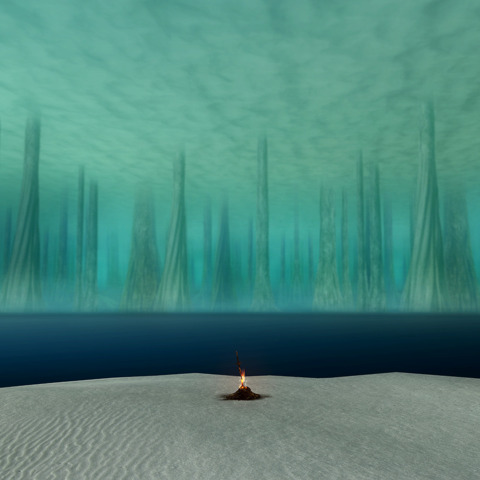

In [29]:
Image.open("ash-lake.jpg")

Maybe you're not sure which folder you're working in. Here's how we can check. I'm going to remove the output when I post these online, just because I don't want my file paths on the internet :)

In [132]:
#os.getcwd() curreny working directory

For organization, I almost always prefer to have a separate folder for images. I usually call it `images`.

In [31]:
os.listdir("images") #name of my folder

['artorias.jpg', 'barbie-grid.png', 'anor-londo.jpg']

This is how I can list everything in my current folder.

In [32]:
os.listdir()

['lec8.ipynb',
 '.DS_Store',
 'lec10.ipynb',
 'Student Hours.ipynb',
 'lec12.ipynb',
 'images',
 'lec9.ipynb',
 'lec13.ipynb',
 'lec11.ipynb',
 'ash-lake.jpg',
 '.ipynb_checkpoints']

Say I wanted to open one of the images in my `images` folder. The following will cause an error, since the jpg is not in my current folder, but a subfolder.

In [33]:
Image.open('anor-londo.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'anor-londo.jpg'

To navigate to the `images` folder, I could type out the path name directly, but this is going to be different for different operating systems. The way I'm going to show you is maybe cumbersome, but has the benefit of being able to work for any operating system.

In [35]:
s = os.path.join("images","anor-londo.jpg")

In [37]:
s

'images/anor-londo.jpg'

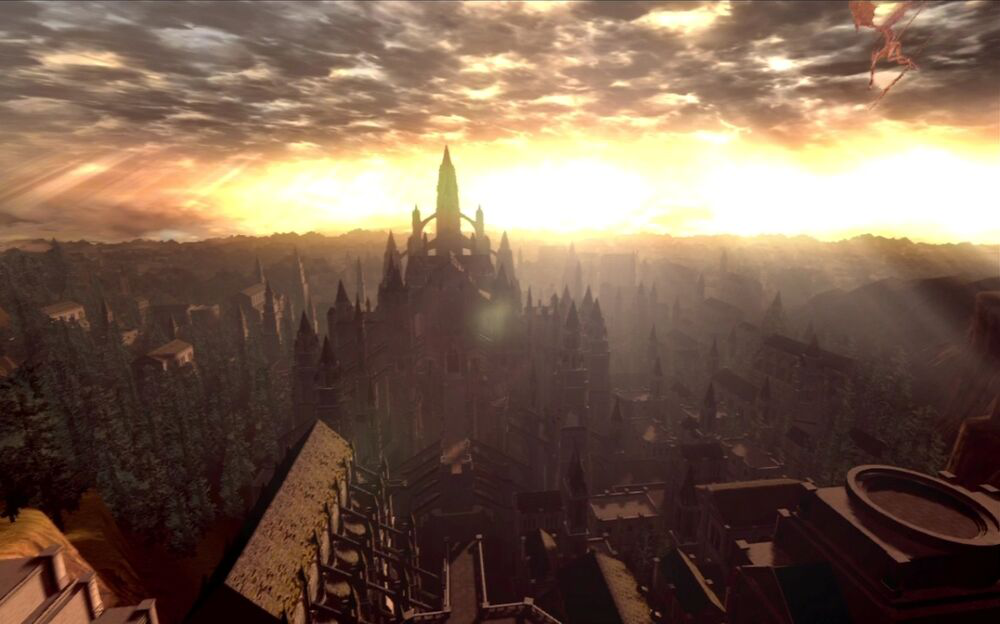

In [36]:
Image.open(s)

How could I get all of the jpgs in a folder?

In [42]:
os.listdir("images")

['artorias.jpg', 'barbie-grid.png', 'anor-londo.jpg']

Less pythonic way:

In [43]:
[x for x in os.listdir("images") if x[-3:] == "jpg"]

['artorias.jpg', 'anor-londo.jpg']

More pythonic way:

In [45]:
[x for x in os.listdir("images") if x.endswith("jpg")]

['artorias.jpg', 'anor-londo.jpg']

In [47]:
[ x for x in os.listdir("images") if x.endswith("jpg") ]

['artorias.jpg', 'anor-londo.jpg']

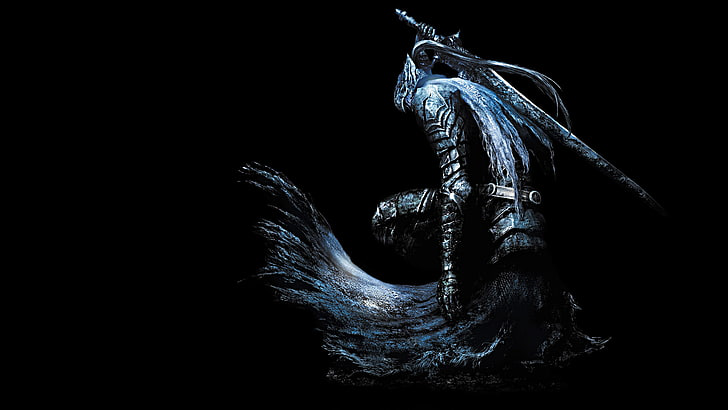

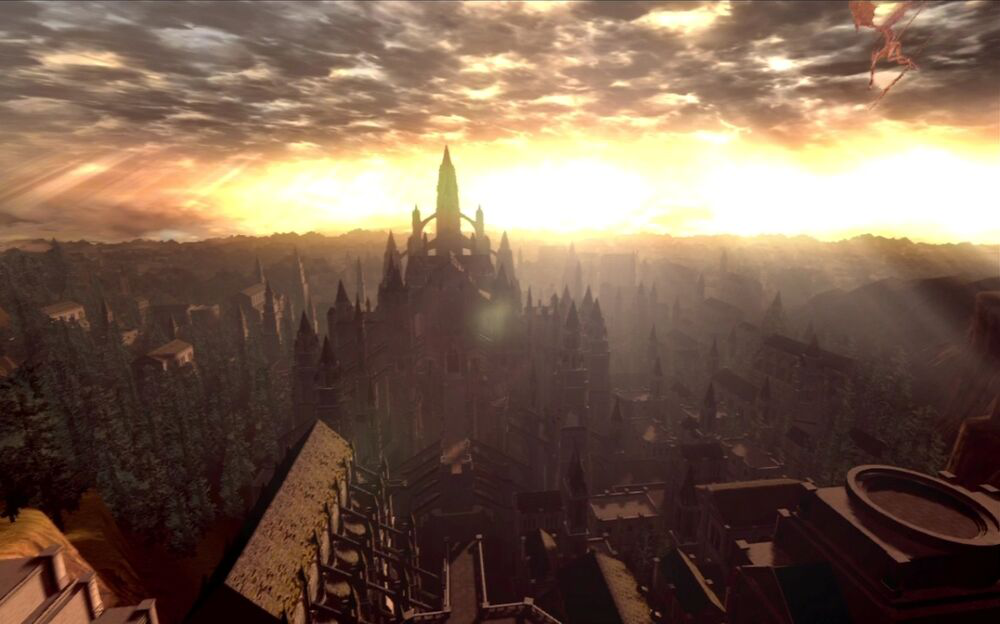

In [53]:
for x in os.listdir("images"):
    if x.endswith("jpg"):
        img = Image.open(os.path.join("images",x))
        display(img)

### NumPy Arrays and Images

In [54]:
img = Image.open("ash-lake.jpg")

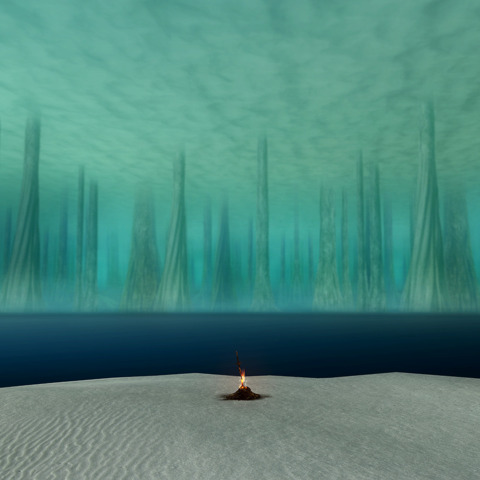

In [59]:
img

In [55]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

We can see this is not a NumPy array...here's what we do.

In [56]:
arr = np.asarray(img)

In [63]:
arr

array([[[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 94, 157, 140],
        [ 94, 157, 140],
        [ 94, 157, 140]],

       [[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 93, 156, 139],
        [ 93, 156, 139],
        [ 93, 156, 139]],

       [[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 93, 156, 139],
        [ 92, 155, 138],
        [ 92, 155, 138]],

       ...,

       [[117, 128, 120],
        [140, 151, 143],
        [152, 163, 155],
        ...,
        [113, 126, 119],
        [117, 130, 123],
        [121, 134, 127]],

       [[128, 139, 131],
        [129, 140, 132],
        [124, 135, 127],
        ...,
        [112, 125, 118],
        [114, 127, 120],
        [116, 129, 122]],

       [[130, 141, 133],
        [118, 129, 121],
        [105, 117, 107],
        ...,
        [119, 132, 125],
        [120, 133, 126],
        [121, 134, 127]]

In [57]:
type(arr)

numpy.ndarray

In [58]:
arr.shape

(480, 480, 3)

Think of this as saying we have $480 \times 480$ pixels, and each pixel has an RGB (Red-Green-Blue) triple.

Let's get the top-left-most pixel.

In [60]:
arr[0,0]

array([ 83, 161, 148], dtype=uint8)

This is saying we have 83 Red, 161 Green, 148 Blue.

Maybe I wonder what the range of these RGB values is.

In [61]:
arr.min()

0

In [62]:
arr.max()

255

All together, there are $2^8 = 256$ possibilities for each RGB value. This is why we store these as 8-bit integers (notice the `dtype=uint8` in `arr`).

In [65]:
(arr[:,300:]).shape

(480, 180, 3)

Let's actually visualize this slice!

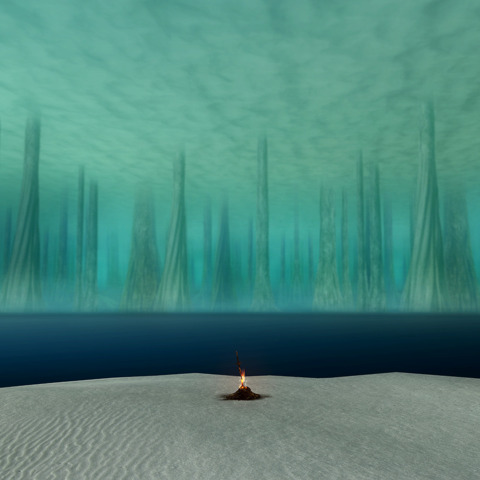

In [67]:
img

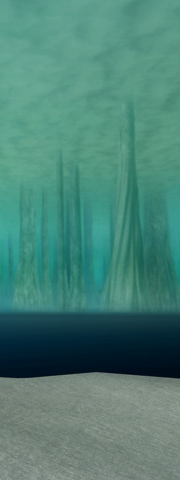

In [66]:
Image.fromarray(arr[:,300:])

### Setting Colors 

__Goal:__ Change a horizontal band of the image to a single color.

In [68]:
img = Image.open("ash-lake.jpg")
arr = np.asarray(img)

Let's start by getting a horizontal band.

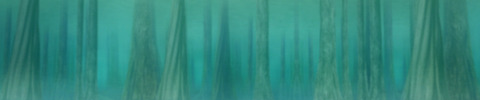

In [69]:
Image.fromarray(arr[200:300])

This is going to throw an error!

In [72]:
arr[200:300] = 0

ValueError: assignment destination is read-only

Main point: `img` and `arr` are _references_ to the image. What this means for us is that we can look, but we can't change anything. To get around this, we work on a copy!

In [73]:
B = arr.copy()

In [74]:
import sys

The size of `img` is SO small! This is because it's a reference.

In [75]:
sys.getsizeof(img)

48

This is still pretty small! 

In [76]:
sys.getsizeof(arr)

144

In [77]:
sys.getsizeof(B)

691344

Aside from the chat. A very good point! The following makes me a litle nervous, let's talk about it in office hours :)

In [78]:
a = np.zeros((1000,1000))

In [79]:
b = a

In [80]:
sys.getsizeof(a)

8000128

In [81]:
sys.getsizeof(b)

8000128

In [82]:
B[200:300] = 0

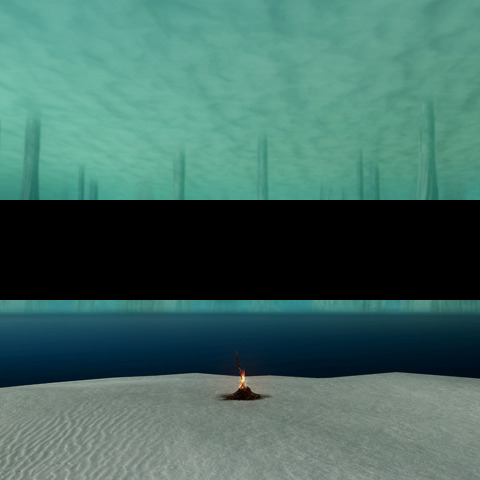

In [83]:
Image.fromarray(B)

In [84]:
B[200:300] = 255

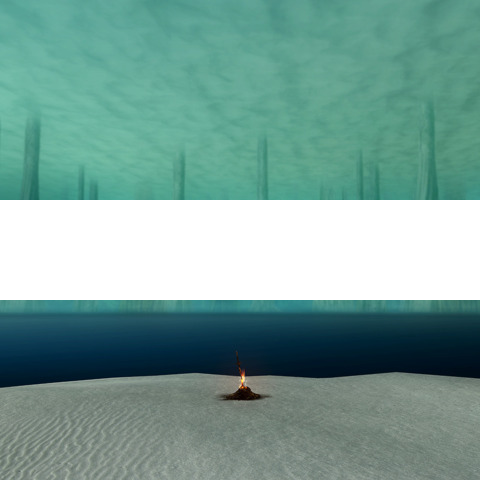

In [85]:
Image.fromarray(B)

Remember, this was the top-left-most color from earlier:

In [88]:
colors = np.array([83, 161, 148])

In [87]:
B[200:300].shape

(100, 480, 3)

In [89]:
colors.shape

(3,)

In [90]:
B[200:300] = colors

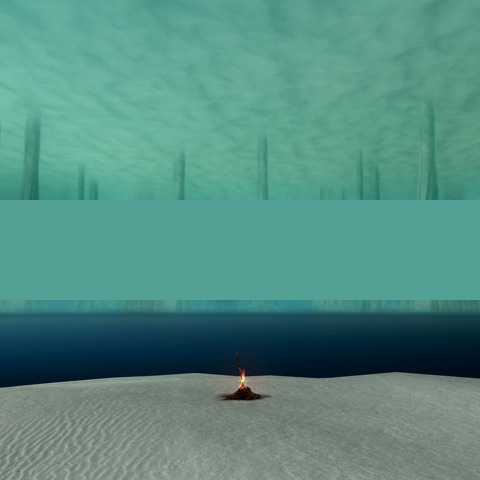

In [91]:
Image.fromarray(B)

Just for fun! From color picker:

In [92]:
B[200:300] = np.array([242, 190, 252])

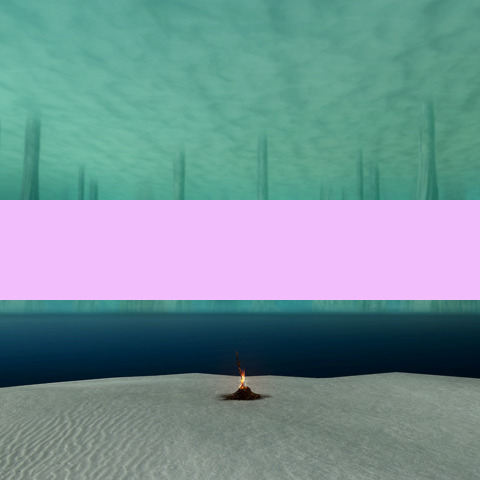

In [93]:
Image.fromarray(B)

### Making an image from scratch

In [95]:
arr = np.array([[[255,0,0],[0,255,0]],[[0,0,255],[255,255,0]]])

I'll start by making an error :)

In [96]:
Image.fromarray(arr)

TypeError: Cannot handle this data type: (1, 1, 3), <i8

The issue here is that I haven't specified a data type. What should it be?

In [97]:
arr = np.array([[[255,0,0],[0,255,0]],[[0,0,255],[255,255,0]]],dtype=np.uint8)

You might think there's another error when we run this...

In [99]:
img = Image.fromarray(arr)

In [100]:
img

No error, it's just 2 pixels by 2 pixels...super small and hard to see.

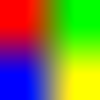

In [101]:
img.resize((100,100))

Maybe I don't like how it has extended the pixels (the blurring).

In [102]:
help(img.resize)

Help on method resize in module PIL.Image:

resize(size, resample=None, box=None, reducing_gap=None) method of PIL.Image.Image instance
    Returns a resized copy of this image.
    
    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param resample: An optional resampling filter.  This can be
       one of :py:data:`PIL.Image.Resampling.NEAREST`,
       :py:data:`PIL.Image.Resampling.BOX`,
       :py:data:`PIL.Image.Resampling.BILINEAR`,
       :py:data:`PIL.Image.Resampling.HAMMING`,
       :py:data:`PIL.Image.Resampling.BICUBIC` or
       :py:data:`PIL.Image.Resampling.LANCZOS`.
       If the image has mode "1" or "P", it is always set to
       :py:data:`PIL.Image.Resampling.NEAREST`.
       If the image mode specifies a number of bits, such as "I;16", then the
       default filter is :py:data:`PIL.Image.Resampling.NEAREST`.
       Otherwise, the default filter is
       :py:data:`PIL.Image.Resampling.BICUBIC`. See: :ref:`concept-filters`.
   

In [103]:
dir(Image.Resampling)

['BICUBIC',
 'BILINEAR',
 'BOX',
 'HAMMING',
 'LANCZOS',
 'NEAREST',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [104]:
for s in dir(Image.Resampling):
    if s[0] != '_':
        print(s)

BICUBIC
BILINEAR
BOX
HAMMING
LANCZOS
NEAREST


There is an issue in how we join `s` to the end.

In [107]:
for s in dir(Image.Resampling):
    if s[0] != '_':
        print(s)
        display(img.resize((100,100),resample=Image.Resampling.s))

BICUBIC


AttributeError: s

__Fix 1:__

BICUBIC


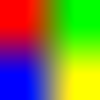

BILINEAR


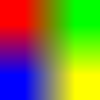

BOX


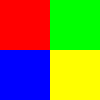

HAMMING


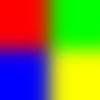

LANCZOS


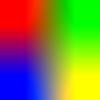

NEAREST


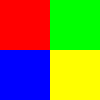

In [108]:
for s in dir(Image.Resampling):
    if s[0] != '_':
        print(s)
        display(img.resize((100,100),resample=getattr(Image.Resampling,s)))

__Fix 2:__ This method is less flexible (I wouldn't usually expect it to work), but it does the job in this case.

BICUBIC


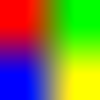

BILINEAR


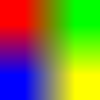

BOX


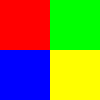

HAMMING


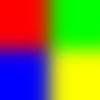

LANCZOS


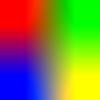

NEAREST


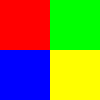

In [112]:
for s in dir(Image.Resampling):
    if s[0] != '_':
        print(s)
        display(img.resize((100,100),resample=Image.Resampling[s]))

### Swapping color channels

__Goal:__ Want to swap the Red and Blue color channels.

In [113]:
img = Image.open("ash-lake.jpg")
arr = np.asarray(img)

In [114]:
arr

array([[[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 94, 157, 140],
        [ 94, 157, 140],
        [ 94, 157, 140]],

       [[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 93, 156, 139],
        [ 93, 156, 139],
        [ 93, 156, 139]],

       [[ 83, 161, 148],
        [ 83, 161, 148],
        [ 83, 161, 148],
        ...,
        [ 93, 156, 139],
        [ 92, 155, 138],
        [ 92, 155, 138]],

       ...,

       [[117, 128, 120],
        [140, 151, 143],
        [152, 163, 155],
        ...,
        [113, 126, 119],
        [117, 130, 123],
        [121, 134, 127]],

       [[128, 139, 131],
        [129, 140, 132],
        [124, 135, 127],
        ...,
        [112, 125, 118],
        [114, 127, 120],
        [116, 129, 122]],

       [[130, 141, 133],
        [118, 129, 121],
        [105, 117, 107],
        ...,
        [119, 132, 125],
        [120, 133, 126],
        [121, 134, 127]]

This might be trickier than you'd expect. I'll start by making a common mistake.

In [116]:
mylist = [ 83, 161, 148]
mylist[0] = mylist[2]
mylist[2] = mylist[0]
mylist

[148, 161, 148]

Common way:

In [118]:
mylist = [ 83, 161, 148]
temp = mylist[0]
mylist[0] = mylist[2]
mylist[2] = temp
mylist

[148, 161, 83]

We want to use this idea and apply it to all of `arr`. Again, there will be mistakes here.

In [119]:
B = arr.copy()
temp = B[:,:,0] #Red values; pointing to B - if B changes, so does temp
B[:,:,0] = B[:,:,2]
B[:,:,2] = temp

In [120]:
B[0,0]

array([148, 161, 148], dtype=uint8)

In [121]:
temp2 = B[:,:,0].copy()

In [123]:
sys.getsizeof(temp)

128

In [124]:
sys.getsizeof(temp2)

230528

Here's how we can do it using the fact that `arr` is read-only

In [125]:
#Swaps the Red and Blue Channels
B = arr.copy()
B[:,:,0] = arr[:,:,2]
B[:,:,2] = arr[:,:,0]

In [126]:
B[0,0]

array([148, 161,  83], dtype=uint8)

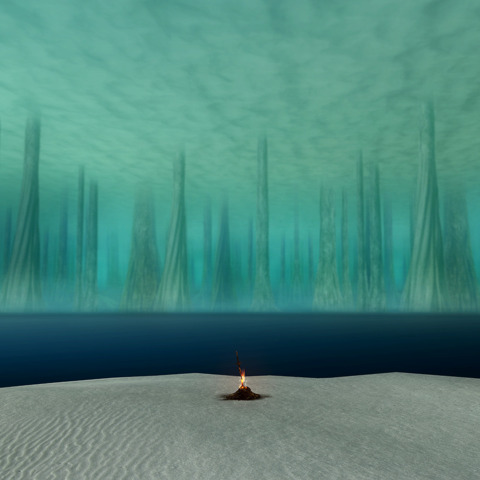

In [127]:
img

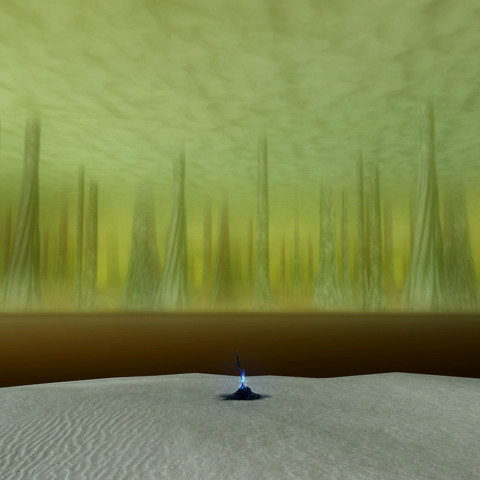

In [128]:
Image.fromarray(B)

Caption from chat: This could be from Dune

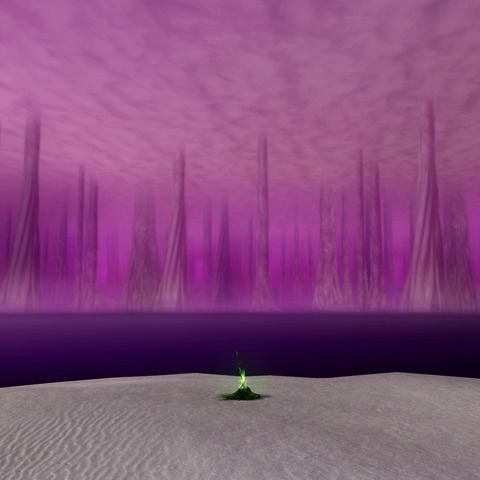

In [130]:
#Swaps the Red and Green Channels
B = arr.copy()
B[:,:,0] = arr[:,:,1]
B[:,:,1] = arr[:,:,0]
Image.fromarray(B)

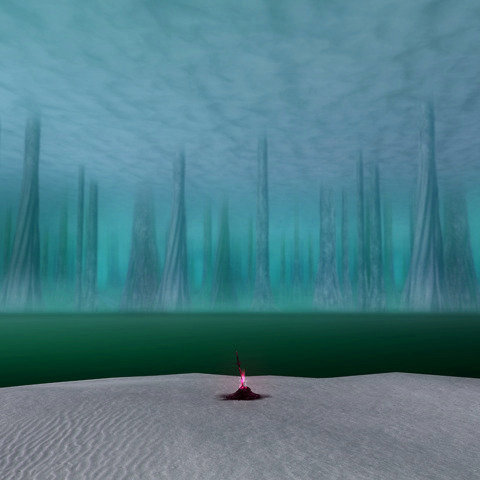

In [131]:
#Swaps the Green and Blue Channels
B = arr.copy()
B[:,:,1] = arr[:,:,2]
B[:,:,2] = arr[:,:,1]
Image.fromarray(B)